<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Price-Prediction-of-Used-Cars-using-Linear-Regression-Model" data-toc-modified-id="Price-Prediction-of-Used-Cars-using-Linear-Regression-Model-1">Price Prediction of Used Cars using Linear Regression Model</a></span><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1.1">Importing Libraries</a></span></li><li><span><a href="#Collecting-Data" data-toc-modified-id="Collecting-Data-1.2">Collecting Data</a></span><ul class="toc-item"><li><span><a href="#Cleaning-the-Data" data-toc-modified-id="Cleaning-the-Data-1.2.1">Cleaning the Data</a></span></li></ul></li><li><span><a href="#Analyzing-the-data" data-toc-modified-id="Analyzing-the-data-1.3">Analyzing the data</a></span><ul class="toc-item"><li><span><a href="#Price-per-year-and-Mileage" data-toc-modified-id="Price-per-year-and-Mileage-1.3.1">Price per year and Mileage</a></span></li></ul></li><li><span><a href="#Create-Prediction-Models" data-toc-modified-id="Create-Prediction-Models-1.4">Create Prediction Models</a></span><ul class="toc-item"><li><span><a href="#Create-dummy-variables-for-the-year-column" data-toc-modified-id="Create-dummy-variables-for-the-year-column-1.4.1">Create dummy variables for the year column</a></span></li></ul></li><li><span><a href="#Linear-Regression-Model" data-toc-modified-id="Linear-Regression-Model-1.5">Linear Regression Model</a></span></li></ul></li></ul></div>

# Price Prediction of Used Cars using Linear Regression Model

## Importing Libraries

In [1]:
from selenium import webdriver
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

In [2]:
chrome_path = r"/Users/warmachine/Documents/Documents/Stuff/Machine Learning/Data Mining Lab/Price Prediction of Used Cars/chromedriver"

driver = webdriver.Chrome(chrome_path)

## Collecting Data

* Collecting data on Kia Sorento from Carmax.com (500 cars)
* I am limiting my search to five-year old cars (2013-2018)

In [4]:
title_list = []
price_list = []
mileage_list = []

for i in range(1,11):
    url = 'https://www.carmax.com/search#Distance=all&ExposedCategories=249+250+1001+1000+265+999+772&ExposedDimensions=249+250+1001+1000+265+999+772&FreeText=kia%20sorento&MaxYear=2018&MinYear=2013&Page=' + str(i) + '&PerPage=50&SortKey=0&Zip=92618'
    
    driver.get(url)
    titles = driver.find_elements_by_class_name("vehicle-browse--result-title-description")
    
    for title in titles:
        title_list.append(title.text)
        
    # Remove 'empty titles' 
    title_list = [title for title in title_list if title != '']
    
    prices = driver.find_elements_by_class_name("vehicle-browse--result-price")
    
    for price in prices:
        price_list.append(price.text)
    
    mileages = driver.find_elements_by_class_name("vehicle-browse--result-mileage")
    
    for mileage in mileages:
        mileage_list.append(mileage.text)

In [5]:
# Create dataframe from the list

cars = pd.DataFrame({'Title': title_list, 'Price': price_list, 'Mileage': mileage_list})


print(cars.shape)
print(cars.head(10))

(500, 3)
  Mileage   Price                Title
0     27K  13,499  2014 Kia Sorento LX
1     16K  15,998  2015 Kia Sorento LX
2     44K  23,899  2016 Kia Sorento EX
3     25K  22,899  2017 Kia Sorento LX
4     20K  18,998  2017 Kia Sorento LX
5     19K  24,998  2016 Kia Sorento SX
6     10K  20,998  2016 Kia Sorento EX
7     64K  22,998  2016 Kia Sorento EX
8     82K  24,998  2015 Kia Sorento SX
9     15K  17,998  2014 Kia Sorento LX


### Cleaning the Data

In [6]:
# Splitting the Title column into 4 columns

cars[['Year', 'Brand', 'Model', 'Trim']] = cars.Title.str.rsplit(n=4, expand = True)

del cars['Title']

print(cars.head(10))

  Mileage   Price  Year Brand    Model Trim
0     27K  13,499  2014   Kia  Sorento   LX
1     16K  15,998  2015   Kia  Sorento   LX
2     44K  23,899  2016   Kia  Sorento   EX
3     25K  22,899  2017   Kia  Sorento   LX
4     20K  18,998  2017   Kia  Sorento   LX
5     19K  24,998  2016   Kia  Sorento   SX
6     10K  20,998  2016   Kia  Sorento   EX
7     64K  22,998  2016   Kia  Sorento   EX
8     82K  24,998  2015   Kia  Sorento   SX
9     15K  17,998  2014   Kia  Sorento   LX


In [7]:
cars.Year

0      2014
1      2015
2      2016
3      2017
4      2017
5      2016
6      2016
7      2016
8      2015
9      2014
10     2014
11     2015
12     2016
13     2015
14     2015
15     2016
16     2014
17     2015
18     2015
19     2016
20     2016
21     2015
22     2014
23     2015
24     2016
25     2015
26     2015
27     2015
28     2015
29     2015
       ... 
470    2016
471    2015
472    2014
473    2015
474    2016
475    2015
476    2015
477    2015
478    2015
479    2015
480    2014
481    2015
482    2016
483    2015
484    2015
485    2017
486    2015
487    2015
488    2017
489    2015
490    2015
491    2015
492    2014
493    2015
494    2015
495    2015
496    2015
497    2015
498    2014
499    2015
Name: Year, Length: 500, dtype: object

In [8]:
# Since the data type of year is object we need to change it to integer

cars['Year'] = [int (x) for x in cars['Year']]

In [9]:
cars.Year

0      2014
1      2015
2      2016
3      2017
4      2017
5      2016
6      2016
7      2016
8      2015
9      2014
10     2014
11     2015
12     2016
13     2015
14     2015
15     2016
16     2014
17     2015
18     2015
19     2016
20     2016
21     2015
22     2014
23     2015
24     2016
25     2015
26     2015
27     2015
28     2015
29     2015
       ... 
470    2016
471    2015
472    2014
473    2015
474    2016
475    2015
476    2015
477    2015
478    2015
479    2015
480    2014
481    2015
482    2016
483    2015
484    2015
485    2017
486    2015
487    2015
488    2017
489    2015
490    2015
491    2015
492    2014
493    2015
494    2015
495    2015
496    2015
497    2015
498    2014
499    2015
Name: Year, Length: 500, dtype: int64

In [10]:
# Remove comma separator in the price column and set it to numeric data type

cars['Price'] = cars['Price'].map(lambda x: x.replace(',', '')) #removed comma with whitespace

cars['Price'] = pd.to_numeric(cars['Price'], errors = 'coerce', downcast = 'integer') # if error is generated it is changed to NaN

In [11]:
# Remove the thousand indicator as K and convert it to numeric data type

cars['Mileage'] = cars['Mileage'].map(lambda x: x.rstrip('K'))

cars['Mileage'] = pd.to_numeric(cars['Mileage'], errors = 'coerce', downcast = 'integer')


In [12]:
print(cars.head(10))

   Mileage  Price  Year Brand    Model Trim
0       27  13499  2014   Kia  Sorento   LX
1       16  15998  2015   Kia  Sorento   LX
2       44  23899  2016   Kia  Sorento   EX
3       25  22899  2017   Kia  Sorento   LX
4       20  18998  2017   Kia  Sorento   LX
5       19  24998  2016   Kia  Sorento   SX
6       10  20998  2016   Kia  Sorento   EX
7       64  22998  2016   Kia  Sorento   EX
8       82  24998  2015   Kia  Sorento   SX
9       15  17998  2014   Kia  Sorento   LX


In [13]:
cars.info(memory_usage = 'deep') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
Mileage    500 non-null int8
Price      500 non-null int16
Year       500 non-null int64
Brand      500 non-null object
Model      500 non-null object
Trim       500 non-null object
dtypes: int16(1), int64(1), int8(1), object(3)
memory usage: 95.0 KB


## Analyzing the data

In [14]:
# Getting all the unique trims
sorento_trim = list(cars["Trim"].unique())

print(sorento_trim)

['LX', 'EX', 'SX', 'Limited', 'L']


In [15]:
l_sorento = cars[cars['Trim'] == 'L']
l_sorento = l_sorento.reset_index(drop = True)

lx_sorento = cars[cars['Trim'] == 'LX']
lx_sorento = lx_sorento.reset_index(drop = True)

ex_sorento = cars[cars['Trim'] == 'EX']
ex_sorento = ex_sorento.reset_index(drop = True)

limited_sorento = cars[cars['Trim'] == 'Limited']
limited_sorento = limited_sorento.reset_index(drop = True)

sx_sorento = cars[cars['Trim'] == 'SX']
sx_sorento = sx_sorento.reset_index(drop = True)

print(l_sorento.shape)
print(lx_sorento.shape)
print(ex_sorento.shape)
print(limited_sorento.shape)
print(sx_sorento.shape)

(13, 6)
(374, 6)
(54, 6)
(23, 6)
(36, 6)


Majority of used Kia Sorento on sale at Carmax are Sorento LX. 

* The `L` and `LX` trims are the base models and corresponds to 185 HP
* The `EX` trim corresponds to 240 HP
* The `SX` and `SXL` model corresponds to 290 HP

### Price per year and Mileage

In [16]:
color_dict = {2013: 'yellowgreen', 2014: 'orange', 2015: 'blue', 2016: 'magenta', 2017: 'cyan', 2018: 'red'}

In [17]:
def plot_price(df, trim):
    fig, ax = plt.subplots(figsize = (15,10))
    plt.scatter(df['Mileage'], df['Price'],
                c = [color_dict[i] for i in df['Year']],
               )
    
    year_range = (2018, 2017, 2016, 2015, 2014, 2013)
    recs = []
    
    for i in year_range:
        recs.append(mpatches.Rectangle((2,2),1,1,fc=color_dict[i]))
        plt.legend(recs,year_range,loc=1, fontsize = 16)

        
    plt.title('Price of Used Kia Sorento {0} per Mileage and Year\n(Source: {1} cars on Carmax.com)\n'.format(trim, len(df)), 
              fontsize = 20)
    plt.ylabel('Price', fontsize = 16)
    plt.xlabel('Mileage', fontsize = 16)

    xvals = ax.get_xticks()
    ax.set_xticklabels(['{}k'.format(int(x)) for x in xvals])
    
    yvals = ax.get_yticks()
    ax.set_yticklabels(['{:,}k'.format(int(y/1000)) for y in yvals])

    plt.show()

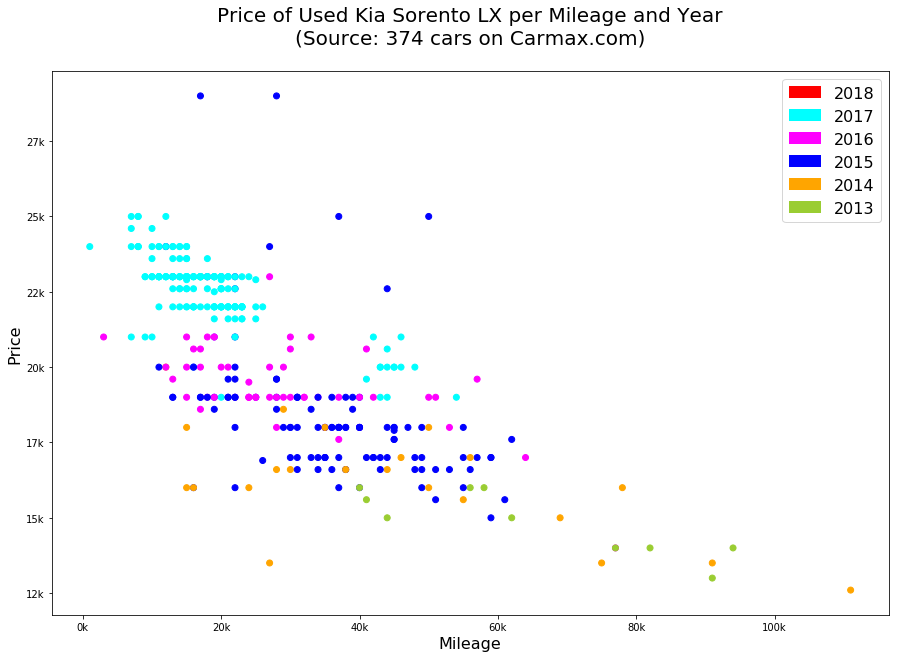

In [18]:
plot_price(lx_sorento, 'LX')

In [19]:
def plot_price_with_best_fit_line(df, trim):
    fig, ax = plt.subplots(figsize = (15,10))
    
    plt.plot(np.unique(df['Mileage']), np.poly1d(np.polyfit(df['Mileage'], df['Price'], 1))(np.unique(df['Mileage'])), 
             c = 'red',
             linewidth = 3)
    
    plt.scatter(df['Mileage'], df['Price'], 
                c = [color_dict[i] for i in df['Year']], 
                )

    year_range = (2018,2017,2016,2015,2014,2013) 
    recs = []
    for i in year_range:
        recs.append(mpatches.Rectangle((2,2),1,1,fc=color_dict[i]))
        plt.legend(recs,year_range,loc=1, fontsize = 16)

    plt.title('Price of Used Kia Sorento {0} per Mileage and Year\n(Source: {1} cars on Carmax.com)\n'.format(trim, len(df)), 
              fontsize = 20)
    plt.ylabel('Price', fontsize = 16)
    plt.xlabel('Mileage', fontsize = 16)

    xvals = ax.get_xticks()
    ax.set_xticklabels(['{}k'.format(int(x)) for x in xvals])
    
    yvals = ax.get_yticks()
    ax.set_yticklabels(['{:,}k'.format(int(y/1000)) for y in yvals])

    plt.show()

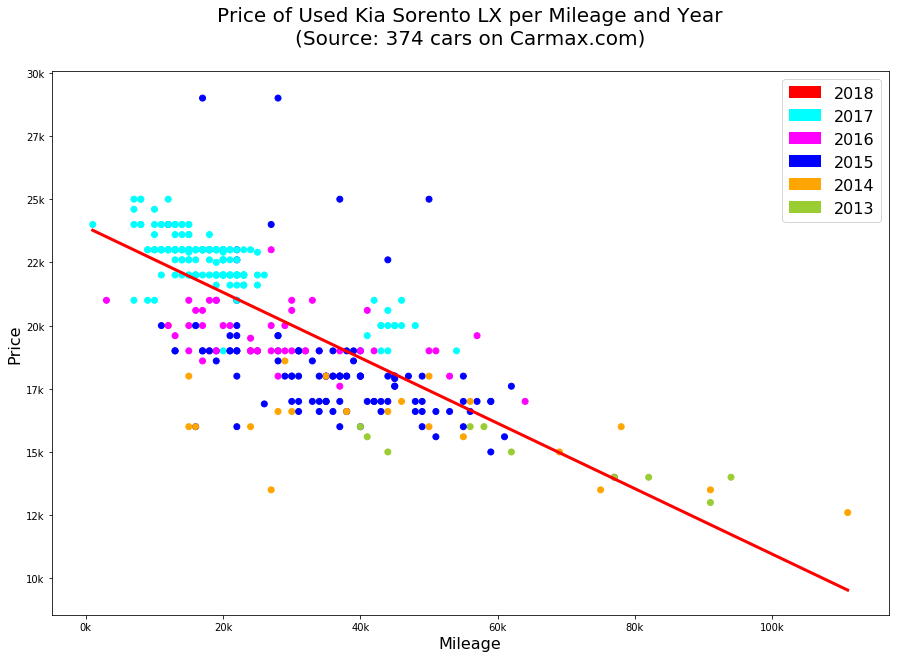

In [20]:
plot_price_with_best_fit_line(lx_sorento, 'LX')

In [21]:
def plot_price_with_best_fit_lines(df, trim):
    fig, ax = plt.subplots(figsize = (15,10))
    
    for year in color_dict:
        df_year = df[df['Year'] == year]
        
        if len(df_year) == 0:
            pass
        
        else:
        
            plt.plot(np.unique(df_year['Mileage']), 
                     np.poly1d(np.polyfit(df_year['Mileage'], df_year['Price'], 1))(np.unique(df_year['Mileage'])), 
                     c = color_dict[year],
                     linewidth = 3)
        
            plt.scatter(df_year['Mileage'], 
                        df_year['Price'], 
                        c = color_dict[year], 
                        )

    year_range = (2018,2017,2016,2015,2014,2013) 
    recs = []
    for i in year_range:
        recs.append(mpatches.Rectangle((2,2),1,1,fc=color_dict[i]))
        plt.legend(recs,year_range,loc=1, fontsize = 16)

    plt.title('Price of Used Kia Sorento {0} per Mileage and Year\n(Source: {1} cars on Carmax.com)\n'.format(trim, len(df)), 
              fontsize = 20)
    plt.ylabel('Price', fontsize = 16)
    plt.xlabel('Mileage', fontsize = 16)

    xvals = ax.get_xticks()
    ax.set_xticklabels(['{}k'.format(int(x)) for x in xvals])
    
    yvals = ax.get_yticks()
    ax.set_yticklabels(['{:,}k'.format(int(y/1000)) for y in yvals])

    plt.show()

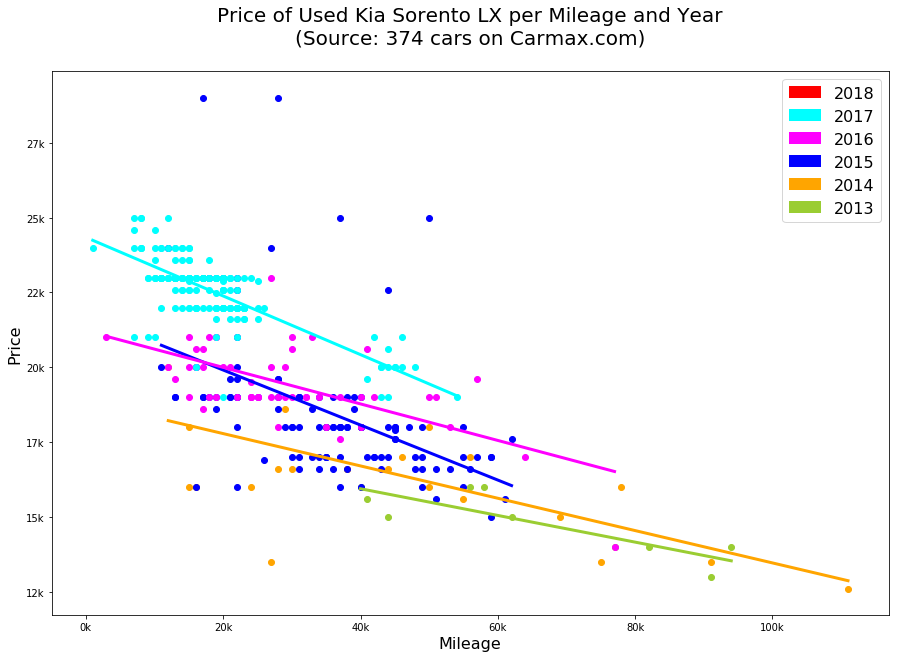

In [23]:
plot_price_with_best_fit_lines(lx_sorento, 'LX')

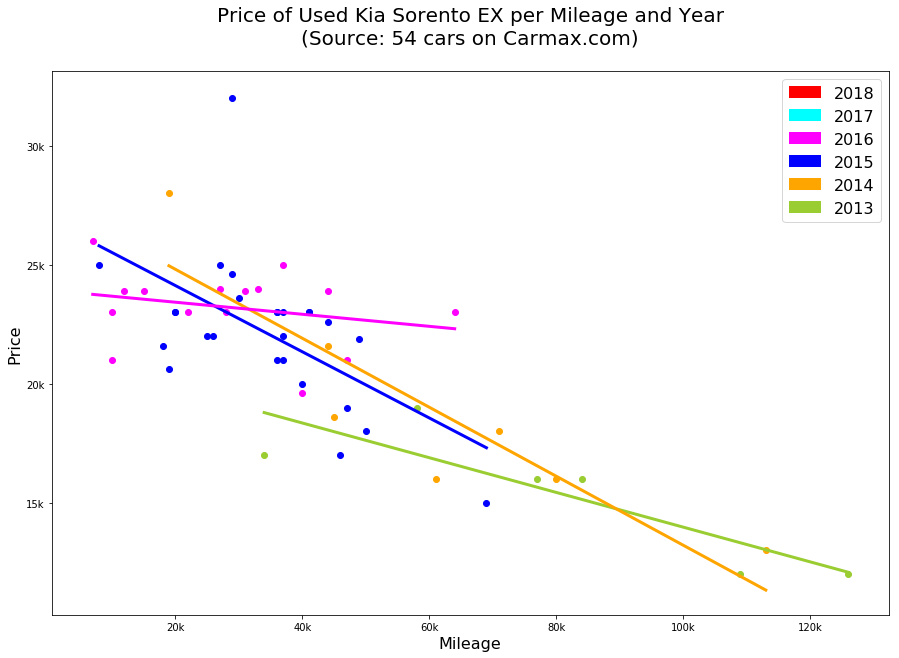

In [24]:
plot_price_with_best_fit_lines(ex_sorento, 'EX')

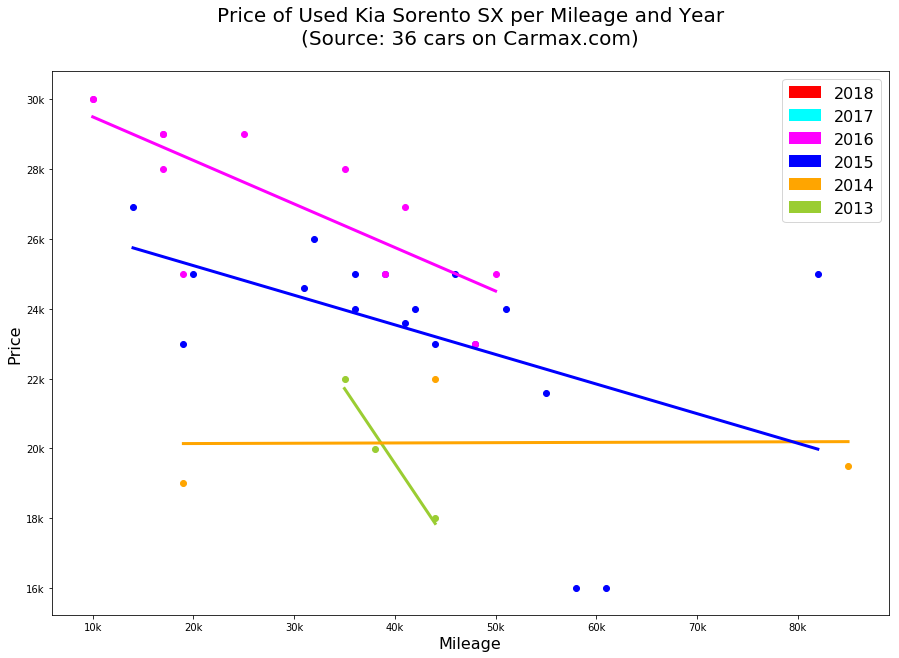

In [25]:
plot_price_with_best_fit_lines(sx_sorento, 'SX')

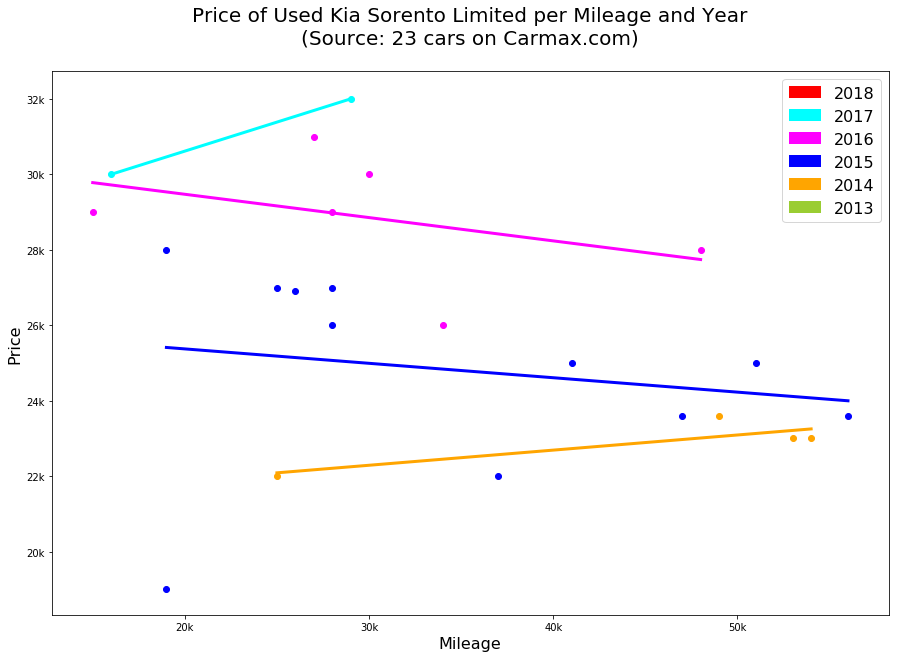

In [26]:
plot_price_with_best_fit_lines(limited_sorento, 'Limited')

The graph shows that for a given mileage, newer cars tend to have more price.

## Create Prediction Models

### Create dummy variables for the year column

In [27]:
dummy_year = pd.get_dummies(lx_sorento['Year'], prefix = 'year')
lx_sorento = pd.concat([lx_sorento, dummy_year], axis=1)

print(lx_sorento.shape)
print(lx_sorento.head())

(374, 11)
   Mileage  Price  Year Brand    Model Trim  year_2013  year_2014  year_2015  \
0       27  13499  2014   Kia  Sorento   LX          0          1          0   
1       16  15998  2015   Kia  Sorento   LX          0          0          1   
2       25  22899  2017   Kia  Sorento   LX          0          0          0   
3       20  18998  2017   Kia  Sorento   LX          0          0          0   
4       15  17998  2014   Kia  Sorento   LX          0          1          0   

   year_2016  year_2017  
0          0          0  
1          0          0  
2          0          1  
3          0          1  
4          0          0  


In [28]:
features = ['Mileage', 'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017']

In [29]:
# Splitting data into training and testing data

shuffled_rows = np.random.permutation(lx_sorento.index)
shuffled_lx_sorento = lx_sorento.iloc[shuffled_rows]

lim = int(0.7*len(lx_sorento))

train = shuffled_lx_sorento[:lim]

test = shuffled_lx_sorento[lim:]

print(train.shape)
print(test.shape)

(261, 11)
(113, 11)


## Linear Regression Model

In [30]:
linear_reg = LinearRegression()

In [31]:
# Train the model
linear_reg.fit(train[features],train[['Price']])

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
# Make predictions
predictions = linear_reg.predict(test[features])

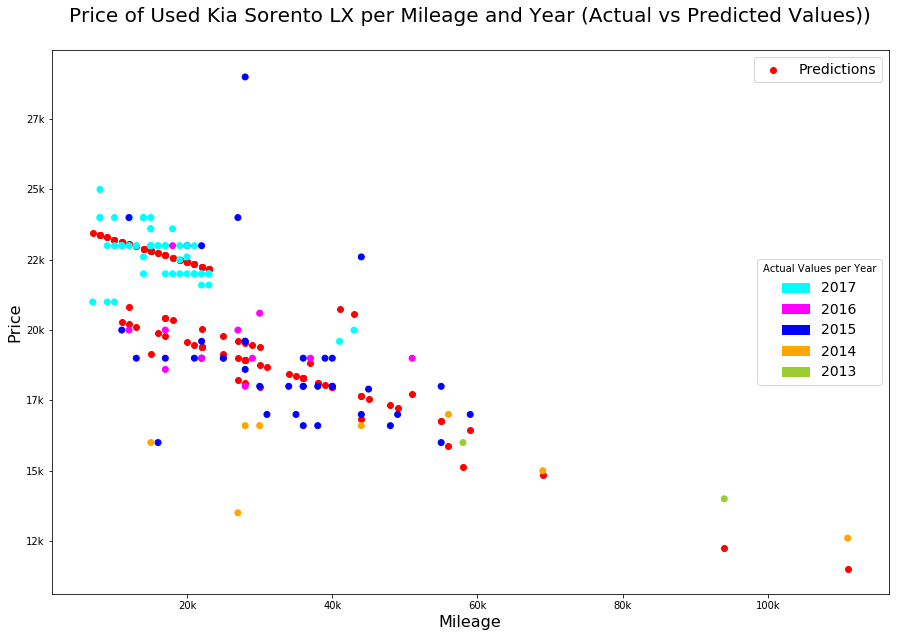

In [33]:
# Plot actual values vs. predictions
fig, ax = plt.subplots(figsize = (15,10))

ax.scatter(test['Mileage'], predictions, c = 'red', label = 'Predictions')

predictions_legend = plt.legend(fontsize = 14)
plt.gca().add_artist(predictions_legend)

ax.scatter(test['Mileage'], test['Price'], c = [color_dict[i] for i in test['Year']])

year_range = (2017,2016,2015,2014,2013) 
recs = []
for i in year_range:
    recs.append(mpatches.Rectangle((2,2),1,1,fc=color_dict[i]))
    plt.legend(recs,year_range,loc=7, fontsize = 14, title = 'Actual Values per Year')
    
plt.title('Price of Used Kia Sorento LX per Mileage and Year (Actual vs Predicted Values))\n', 
              fontsize = 20)

plt.ylabel('Price', fontsize = 16)
plt.xlabel('Mileage', fontsize = 16)

xvals = ax.get_xticks()
ax.set_xticklabels(['{}k'.format(int(x)) for x in xvals])
   
yvals = ax.get_yticks()
ax.set_yticklabels(['{:,}k'.format(int(y/1000)) for y in yvals])

plt.show()

In [34]:
print(linear_reg.intercept_)

[ 21410.6786334]


In [35]:
print(linear_reg.coef_)

[[  -79.84456715 -1667.13218257 -1048.80266929  -254.540564     371.71195893
   2598.76345693]]


In [36]:
#R2 score
print(linear_reg.score(test[features], test[['Price']]))

0.663748326661
